In [2]:
print("Hello World!")

Hello World!


### Tutorials on Deep Learning 
---
video for ref : [YouTube](https://youtu.be/iqQgED9vV7k?si=_JviwdLqp_8eZIRq)

- importing the handwritten digits dataset from keras library
- Using a basic Neural Network try to classify the handwritten images into 10 classes (0-9)

In [3]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline 

In [5]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [8]:
X_train[0].shape

(28, 28)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

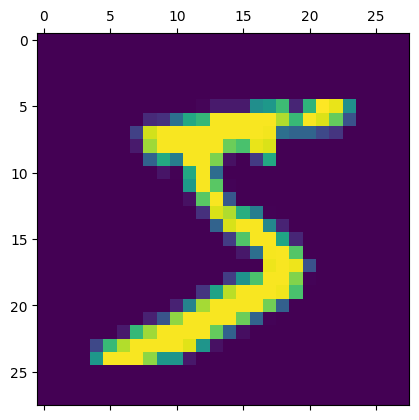

In [10]:
plt.matshow(X_train[0])

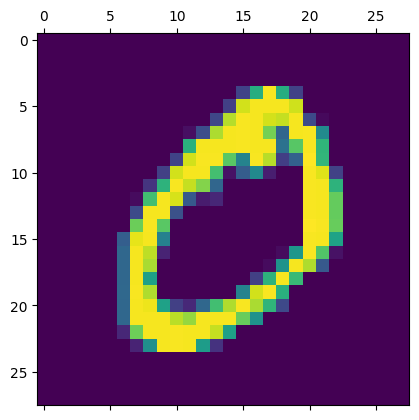

In [11]:
plt.matshow(X_train[1])

First we have to Flatten the 2D array which contains the images pixels 

In [12]:
X_train.shape

(60000, 28, 28)

we can do this by using the reshape function to flatten the 2D array into a 1D array which will have the dimensions :  6000x784 instead of being 6000x28x28 

In [13]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

NOTE : that the images are 28x28 pixels wide. hence the dmiensions of the X_train is 6000x28x28 (no. of images x height of image pixels x width of image pixels)

Similarly we can do the same for flattening the X_test array

In [14]:
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [15]:
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

Now we can make out simple Neural Network.
Which will have a 784 input (layer) neurons and 10 output (layer) neurons 

In [17]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid' )
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5


1875/1875 [==============================] - 5s 2ms/step - loss: 9.6885 - accuracy: 0.8392
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 6.0592 - accuracy: 0.8794
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.6238 - accuracy: 0.8839
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4962 - accuracy: 0.8850
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2985 - accuracy: 0.8866


Many times scaling is a good option to scale the data (make so that the values of the array are between 0 and 1). 
This can be done by dividing the data by the max value of the array (here 255)

In [18]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

X_train_scaled_flattened = X_train_scaled.reshape(len(X_train_scaled),28*28)
X_test_scaled_flattened = X_test_scaled.reshape(len(X_test_scaled),28*28)

In [19]:
X_train_scaled_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Now that all the values are within the range of 0-1, we should see an improvement in the accuracy of our model 

In [25]:
model_v2 = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid' )
])

model_v2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_v2.fit(X_train_scaled_flattened, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4723 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3040 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2729 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2662 - accuracy: 0.9261


These Accuracy is based on the train data only. For actual accuray we should test the model against the test data

In [27]:
model_v2.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 47.7720 - accuracy: 0.9136


[47.772010803222656, 0.9136000275611877]

Now we can use the model to predict values and see if it is actually predicting the correct number

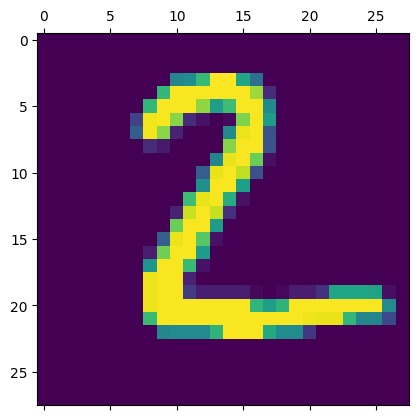

In [28]:
plt.matshow(X_test[1])

In [29]:
predictions = model.predict(X_test_scaled_flattened)
predictions[1]

313/313 [==============================] - 1s 2ms/step


array([4.46162015e-01, 7.09332479e-03, 9.99954700e-01, 1.04347482e-01,
       1.34508724e-12, 9.51231241e-01, 9.81415629e-01, 6.06932773e-18,
       1.17615975e-01, 3.10779505e-14], dtype=float32)

The predictions is an array which has all the predictions for each number (corresponding to the 10 probabilities of of each digit). We can use the argmax() function to give us the index of the highest value 

In [30]:
np.argmax(predictions[1])

2

We convert the predictions into solid labels so that we can feed it into the confusion matrix function

In [33]:
predicted_labels = [np.argmax(i) for i in predictions]

Now the predicted labels will look like the Y_test data

In [31]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [34]:
predicted_labels[:5]

[7, 2, 1, 0, 4]

In [36]:
confusionMatrix = tf.math.confusion_matrix(labels=Y_test, predictions=predicted_labels)
confusionMatrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    2,    2,    0,    5,   10,    3,    1,    0],
       [   0, 1108,    5,    2,    0,    1,    4,    2,   13,    0],
       [   5,    6,  938,   17,    6,    3,   12,   10,   31,    4],
       [   2,    0,   18,  941,    1,   12,    3,    9,   18,    6],
       [   1,    1,    9,    2,  902,    0,   12,    4,   10,   41],
       [   9,    2,    3,   55,    7,  758,   17,    8,   26,    7],
       [  11,    3,   10,    1,    7,   11,  914,    1,    0,    0],
       [   1,    7,   24,    7,    4,    1,    0,  950,    2,   32],
       [   6,    6,    7,   35,    8,   23,   11,   10,  857,   11],
       [  11,    8,    1,   15,   18,    5,    0,   23,    2,  926]])>

Text(95.72222222222221, 0.5, 'Truth')

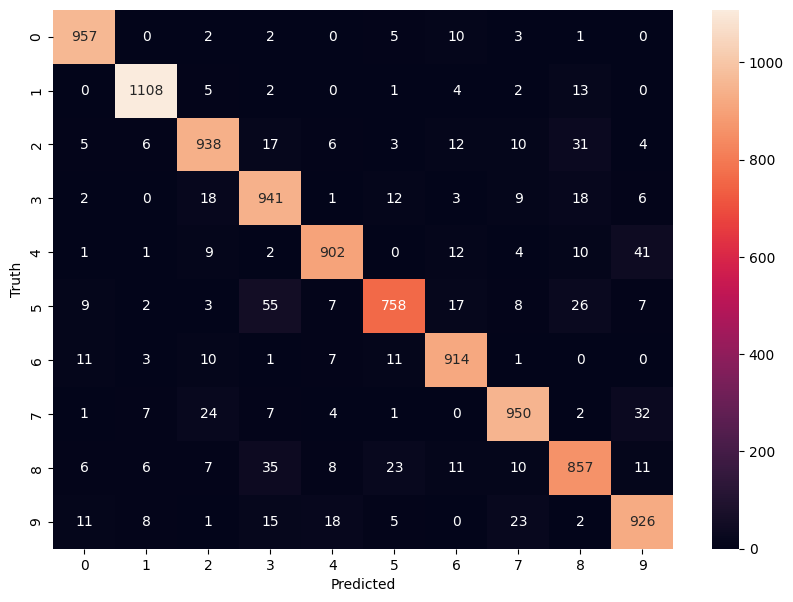

In [38]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(confusionMatrix, annot=True, fmt='d')
plt.xlabel('Predicted' )
plt.ylabel('Truth')

Performance of our model can improve when we introduce our hidden layers. 
Predicting the number of neurons/nodes for the Hidden layers is kinda of trial and error
Just take the output of previous layer as input for the next layer

In [39]:
model_v3 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu' ),
    keras.layers.Dense(10, activation='sigmoid' )                       # notice how didn't mention the input layer here. his is not required for hidden layers or layers in between
])

model_v3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_v3.fit(X_train_scaled_flattened, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2717 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1220 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0837 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0648 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0510 - accuracy: 0.9841


As we can see, we are getting far better results then before after adding an additional hidden layer in our model

In [40]:
model.evaluate(X_test_scaled_flattened,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2699 - accuracy: 0.9251


[0.2699083387851715, 0.9251000285148621]

NOTE : That keras comes a special Flattening layer which just flattens your data fro you when making the model 
This way we don't need to flatten the data every time ourselves 

In [41]:
model_v4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),                          # input shape = the dimensions of the images we can feeding into the model
    keras.layers.Dense(100, input_shape=(784,), activation='relu' ),
    keras.layers.Dense(10, activation='sigmoid' )                       # notice how didn't mention the input layer here. his is not required for hidden layers or layers in between
])

model_v4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_v4.fit(X_train_scaled, Y_train, epochs=5)                         # now we can directly pass in the scaled values itself

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2714 - accuracy: 0.9216
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1252 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0877 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0672 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0532 - accuracy: 0.9829
